Simple Thresholding

Ngưỡng là một số nằm trong đoạn từ 0 đến 255. Giá trị ngưỡng sẽ chia tách giá trị độ xám của ảnh thành 2 miền riêng biệt. Miền thứ nhất là tập hợp các điểm ảnh có giá trị nhỏ hơn giá trị ngưỡng. Miền thứ hai là tập hợp các các điểm ảnh có giá trị lớn hơn hoặc bằng giá trị ngưỡng.
Ở đoạn code dưới, chúng ta thiết lập giá trị ngưỡng là 127
THRESH_BINARY: Có thể dịch là ngưỡng nhị phân. Ý nghĩa y hệt những gì mình đề cập ở trên.

THRESH_BINARY_INV: Ngưỡng nhị phân đảo ngược. Có thể hiểu là nó sẽ đảo ngược lại kết quả của THRESH_BINARY.

THRESH_TRUNC: Những giá trị điểm ảnh bé hơn ngưỡng sẽ giữ nguyên giá trị, những điểm ảnh lớn hơn hoặc ngưỡng sẽ được gán lại là maxvalue.

THRESH_TOZERO: Những điểm ảnh bé hơn ngưỡng sẽ bị gán thành 0, những điểm còn lại giữ nguyên.

THRESH_TOZERO_INV: Những điểm ảnh nhỏ hơn giá trị ngưỡng sẽ được giữ nguyên, những điểm ảnh còn lại sẽ bị gán thành 0.


In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('xam.jpeg',0)

In [ ]:

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    cv.imshow(titles[i],images[i])
cv.waitKey(0)

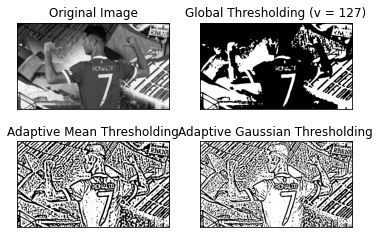

In [4]:
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Otsu's Binarization

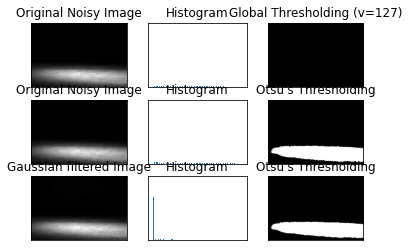

In [15]:
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()